In [ ]:
#Using Pretrained BERT for Text Classification

In [ ]:
#Getting the Data

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub

In [2]:
pip install --upgrade tensorflow-hub

     |████████████████████████████████| 108 kB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/thembajsph/Downloads/anaconda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
(train_data, val_data), info = tfds.load('ag_news_subset:1.0.0', #version 1.0.0
                                         split=('train', 'test'),
                                         with_info=True, 
                                         as_supervised=True)

In [5]:
print(info)

tfds.core.DatasetInfo(
    name='ag_news_subset',
    full_name='ag_news_subset/1.0.0',
    description="""
    AG is a collection of more than 1 million news articles.
    News articles have been gathered from more than 2000  news sources by ComeToMyHead in more than 1 year of activity.
    ComeToMyHead is an academic news search engine which has been running since July, 2004.
    The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc),
    information retrieval (ranking, search, etc), xml, data compression, data streaming,
    and any other non-commercial activity.
    For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .
    
    The AG's news topic classification dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the dataset above.
    It is used as a text classification benchmark in the following paper:
    Xiang Zhang, Junbo Zhao, Yann LeCun. Char

In [6]:
# Displaying the classes

class_names = info.features['label'].names
num_classes = info.features['label'].num_classes

print(f'The news are grouped into {num_classes} classes that are :{class_names}')

The news are grouped into 4 classes that are :['World', 'Sports', 'Business', 'Sci/Tech']


In [7]:
num_train = info.splits['train'].num_examples
num_val = info.splits['test'].num_examples

print(f'The number of training samples: {num_train} \nThe number of validation samples: {num_val}')

The number of training samples: 120000 
The number of validation samples: 7600


In [8]:
news_df = tfds.as_dataframe(train_data.take(10), info)

news_df.head(10)

,description,label
0,b'AMD #39;s new dual-core Opteron chip is desi...,3
1,b'Reuters - Major League Baseball\\Monday anno...,1
2,b'President Bush #39;s quot;revenue-neutral q...,2
3,b'Britain will run out of leading scientists u...,3
4,"b'London, England (Sports Network) - England m...",1
5,b'TOKYO - Sony Corp. is banking on the \\$3 bi...,0
6,b'Giant pandas may well prefer bamboo to lapto...,3
7,"b'VILNIUS, Lithuania - Lithuania #39;s main pa...",0
8,b'Witnesses in the trial of a US soldier charg...,0
9,"b'Dan Olsen of Ponte Vedra Beach, Fla., shot a...",1


In [9]:
for i in range (0,4):

  print(f"Sample news {i}\n \
  Label: {news_df['label'][i]} {(class_names[i])}\n \
  Description: {news_df['description'][i]}\n----------\n")

Sample news 0
   Label: 3 World
   Description: b'AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.'
----------

Sample news 1
   Label: 1 Sports
   Description: b'Reuters - Major League Baseball\\Monday announced a decision on the appeal filed by Chicago Cubs\\pitcher Kerry Wood regarding a suspension stemming from an\\incident earlier this season.'
----------

Sample news 2
   Label: 2 Business
   Description: b'President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.'
----------

Sample news 3
   Label: 3 Sci/Tech
   Description: b'Britain will run out of leading scientists unless science education is improved, says Professor Colin Pillinger.'
----------



In [10]:
news_df.columns

Index(['description', 'label'], dtype='object')

In [ ]:
#Preparing the Data

In [11]:
buffer_size = 1000
batch_size = 32

train_data = train_data.shuffle(buffer_size)
train_data = train_data.batch(batch_size).prefetch(1)
val_data = val_data.batch(batch_size).prefetch(1)

In [12]:
for news, label in train_data.take(1):

  print(f'Sample news\n----\n {news.numpy()[:4]} \n----\nCorresponding labels: {label.numpy()[:4]}')

Sample news
----
 [b' BANGKOK (Reuters) - A second bomb exploded near a food  stall in southern Thailand on Friday, wounding at least nine  members of a bomb squad investigating an earlier blast that  wounded four people.'
 b'Despite a wider quarterly loss, Martha Stewart Living Omnimedia was  quot;optimistic quot; about a springtime advertising rebound and an overall strengthening of the company coinciding with Stewart #39;s release '
 b'Mozilla Firefox is the Web browser you have been waiting for as an alternative to Microsofts Internet Explorer. If you are fed up with security warnings, virus threats and endless security patches from Microsoft, then switch to Firefox - now.'
 b'Red Bull Racing confirmed today that as part of the continued winter test programme, David Coulthard will join the team in Jerez (Spain) this week driving the 2004 car, the R5.'] 
----
Corresponding labels: [0 2 3 1]


In [ ]:
#Getting the BERT Model and its Preprocessing Model from TF Hub

In [14]:
!pip install tensorflow_text
import tensorflow_text as text

     |████████████████████████████████| 4.9 MB 2.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/thembajsph/Downloads/anaconda/bin/python -m pip install --upgrade pip' command.


In [15]:
bert_handle = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2'
preprocessing_model = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [16]:
preprocess_layer = hub.KerasLayer(preprocessing_model)

In [17]:
sample_news = ['Tech rumors: The tech giant Apple is working on its self driving car']

preprocessed_news = preprocess_layer(sample_news)

print(f'Keys       : {list(preprocessed_news.keys())}')
print(f'Shape      : {preprocessed_news["input_word_ids"].shape}')
print(f'Word Ids   : {preprocessed_news["input_word_ids"][0, :5]}')
print(f'Input Mask : {preprocessed_news["input_mask"][0, :5]}')
print(f'Type Ids   : {preprocessed_news["input_type_ids"][0, :5]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [  101  6627 11256  1024  1996]
Input Mask : [1 1 1 1 1]
Type Ids   : [0 0 0 0 0]


In [18]:
bert_model = hub.KerasLayer(bert_handle)

In [19]:
bert_outputs = bert_model(preprocessed_news)

print(f'Pooled output shape:{bert_outputs["pooled_output"].shape}')
print(f'Pooled output values:{bert_outputs["pooled_output"][0, :5]}')
print(f'Sequence output shape:{bert_outputs["sequence_output"].shape}')
print(f'Sequence output values:{bert_outputs["sequence_output"][0, :5]}')

Pooled output shape:(1, 512)
Pooled output values:[ 0.9445979   0.9861868  -0.15102866  0.17372079 -0.6424563 ]
Sequence output shape:(1, 128, 512)
Sequence output values:[[-0.60826135  0.2623039   1.2436795  ... -0.8821721   0.3609534
  -0.00184701]
 [ 0.33820486  0.07993746  1.137402   ... -1.6438915  -1.0649077
  -0.7371697 ]
 [-0.6054916  -0.14994557  0.8464853  ... -0.7473044   0.8475895
   0.13153425]
 [ 0.06868968  0.69697636  1.526533   ... -0.7680911  -0.30986091
   0.25017276]
 [-1.2314894   1.433406   -0.37746835 ... -1.3110954  -0.01984587
   0.7904862 ]]


In [20]:
#Building a News Classifier with BERT

In [21]:
input_text = tf.keras.layers.Input(shape=(), dtype=tf.string, name='Input')

# A preprocesing model before layer BERT
preprocessing_layer = hub.KerasLayer(preprocessing_model, name='preprocessing_layer')

bert_input = preprocessing_layer(input_text)

# Getting a Bert model, set trainable to True
bert_encoder = hub.KerasLayer(bert_handle, trainable=True, name='bert_encoder')

bert_outputs = bert_encoder(bert_input)

# For finetuning, we take pooled_output
pooled_bert_output = bert_outputs['pooled_output']

# Adding a dense layer 

dense_net = tf.keras.layers.Dense(16, activation='relu', name='fully_connected_layer')(pooled_bert_output)
# Add dropout layer for regularization
dense_net = tf.keras.layers.Dropout(0.2)(dense_net)

# Last dense layer for classification purpose
final_output = tf.keras.layers.Dense(4, activation='softmax', name='classifier')(dense_net)

# Combine input and output

news_classifier = tf.keras.Model(input_text, final_output)

In [22]:
news_classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None,)]            0           []                               
                                                                                                  
 preprocessing_layer (KerasLaye  {'input_word_ids':   0          ['Input[0][0]']                  
 r)                             (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

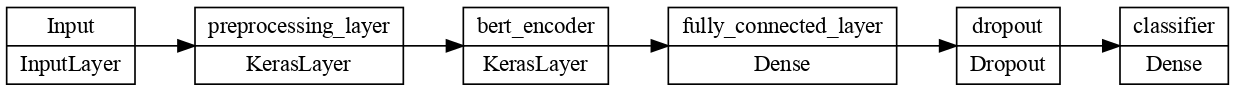

In [23]:
tf.keras.utils.plot_model(news_classifier, rankdir='LR', dpi=120)

In [24]:
#Training a Finetuned BERT

In [25]:
news_classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5), 
                        loss='sparse_categorical_crossentropy', 
                        metrics=['accuracy'])

In [ ]:
# Train the model

batch_size = 32

train_steps = int(len(train_data)/batch_size)
val_steps = int(len(val_data)/batch_size)

history = news_classifier.fit(train_data, 
                    epochs=15,
                    validation_data=val_data,
                    steps_per_epoch=train_steps,
                    validation_steps=val_steps
)

Epoch 1/15
 51/117 [============>.................] - ETA: 8:24 - loss: 1.0641 - accuracy: 0.5625

In [ ]:
#Visualizing the Model Results

In [ ]:
# function to plot accuracy and loss

def plot_acc_loss(history):

  model_history = history.history
  acc = model_history['accuracy']
  val_acc = model_history['val_accuracy']
  loss = model_history['loss']
  val_loss = model_history['val_loss']
  epochs = history.epoch

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc=0)

  # Create a new figure with plt.figure()
  plt.figure()

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc=0)
  plt.show()

In [ ]:
plot_acc_loss(history)

In [ ]:
#Performing Inference on New Texts

In [ ]:
def predict(model, sample_news, class_names):

  # Convert sample news into array

  sample_news = np.array(sample_news)

  # Predict the news type

  preds = model.predict(sample_news)

  pred_class = np.argmax(preds[0])

  print(f'predicted class: {pred_class} \nPredicted Class name: {class_names[pred_class]}')


In [ ]:
sample_news = ['Tesla, a self driving car company is also planning to make a humanoid robot. This humanoid robot appeared dancing in the latest Tesla AI day']

predict(news_classifier, sample_news, class_names)

In [ ]:
sample_news = ["In the last weeks, there has been many transfer suprises in footbal. Ronaldo went back to Old Trafford, "
                "while Messi went to Paris Saint Germain to join his former colleague Neymar."
                "We can't wait to see these two clubs will perform in upcoming leagues"]
            

predict(news_classifier, sample_news, class_names)

In [ ]:
sample_news = ["In the latest tech news: The tech giant NVIDIA has acquired ARM, a microproccessor company"]
            

predict(news_classifier, sample_news, class_names)

In [ ]:
sample_news = ["Salesforce reported making over 1B sales in last quarter"]
            

predict(news_classifier, sample_news, class_names)